In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
color =sns.color_palette()
import sklearn.metrics as metrics 
import warnings
warnings.filterwarnings('ignore')

In [69]:
Default=pd.read_csv("Default.csv")

In [70]:
Default.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.62507
1,2,No,Yes,817.180407,12106.13470
2,3,No,No,1073.549164,31767.13895
3,4,No,No,529.250605,35704.49394
4,5,No,No,785.655883,38463.49588


 Default-no(will pay loan)
student-he is student or not 

In [71]:
Default.shape

(10000, 5)

In [73]:
Default.describe()

,Unnamed: 0,balance,income
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,835.374886,33516.981876
std,2886.89568,483.714985,13336.639563
min,1.00000,0.000000,771.967729
25%,2500.75000,481.731105,21340.462905
50%,5000.50000,823.636973,34552.644800
75%,7500.25000,1166.308387,43807.729275
max,10000.00000,2654.322576,73554.233500


<Axes: ylabel='income'>

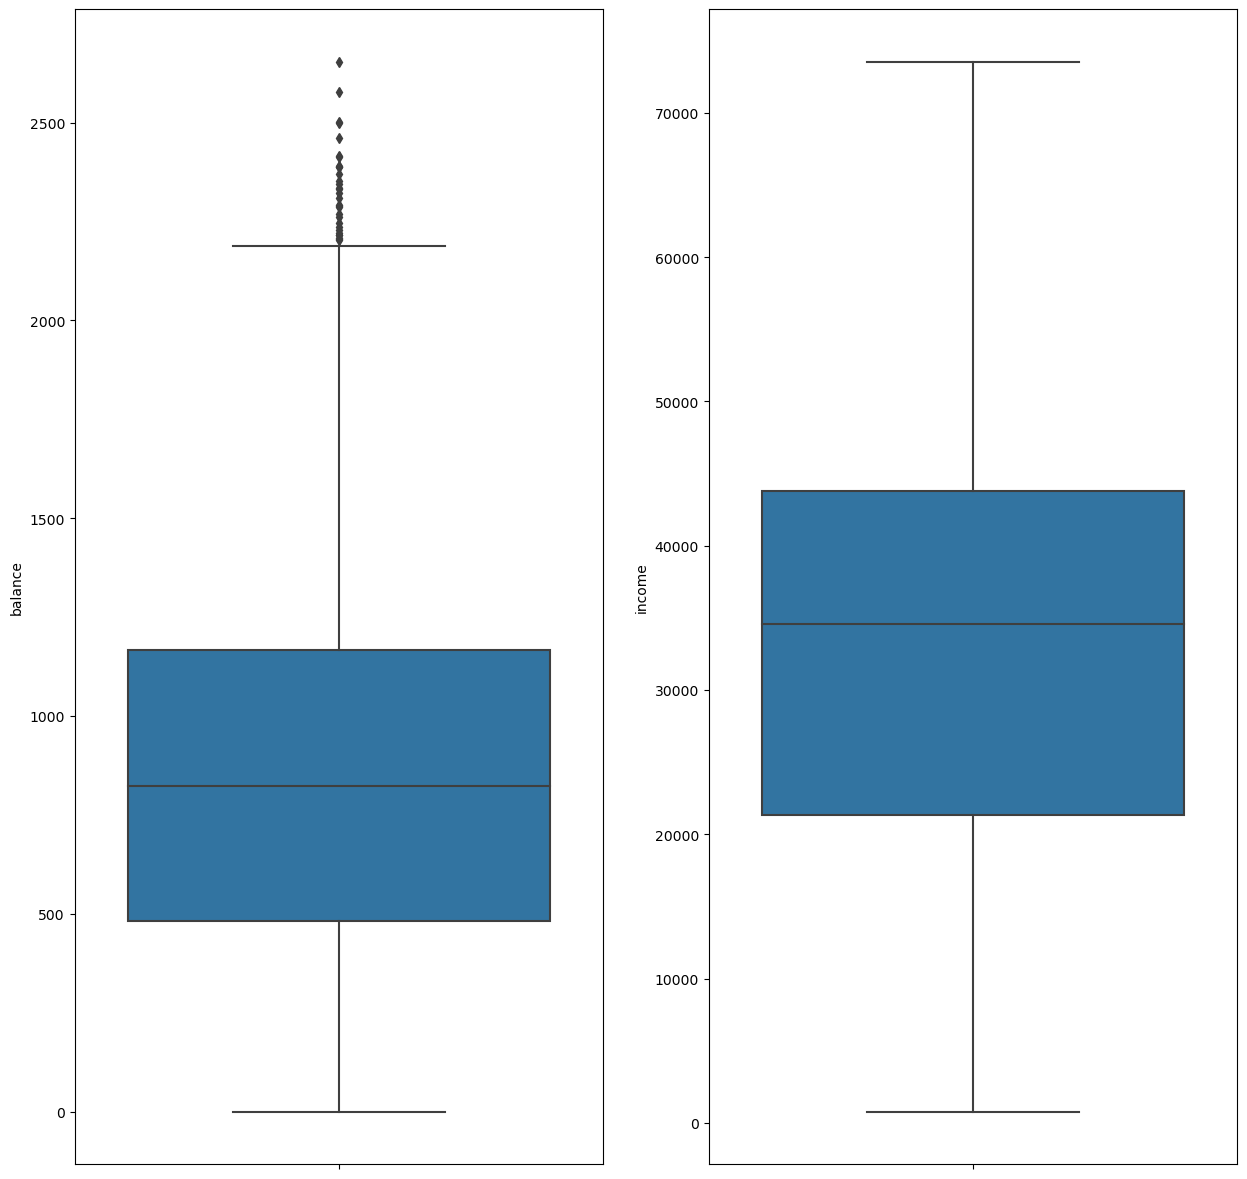

In [7]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)# 1st row 1st col box plot
sns.boxplot(y=Default['balance'])

plt.subplot(1,2,2)# 1st row 2nd col box plot
sns.boxplot(y=Default['income'])

 if we want to  make to make two plots in one frame than we have to use subplot
#median -medium income is near to 35000
#maximum Income more than 70000
#minimum income near to 0
 Most of the income is between 25000 to 450000
 Similar kind of inference for balance

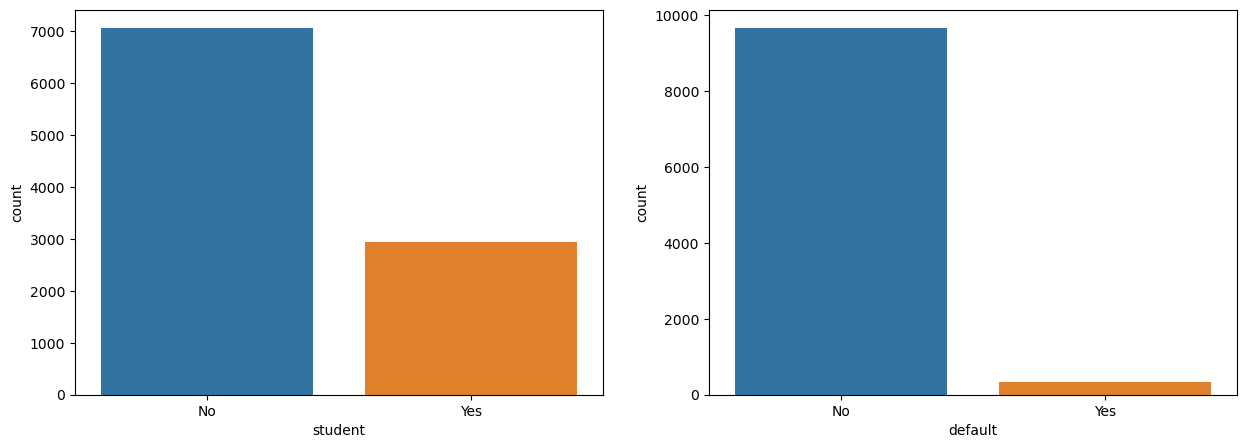

In [28]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)# 1st row 1st col box plot
sns.countplot(x=Default['student'])

plt.subplot(1,2,2)# 1st row 2nd col box plot
sns.countplot(x=Default['default'])
plt.show()

In [74]:
#graph1-very few borrowers are stuent (3000)
#graph2-very less are defaulter any many of them will pay loan back

In [75]:
Default["student"].value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [22]:
Default["default"].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [23]:
Default["student"].value_counts(normalize=True)

No     0.7056
Yes    0.2944
Name: student, dtype: float64

In [76]:
Default["default"].value_counts(normalize=True)

No     0.9667
Yes    0.0333
Name: default, dtype: float64

In [25]:
#96% are not defaulter
#0.3% defaulter

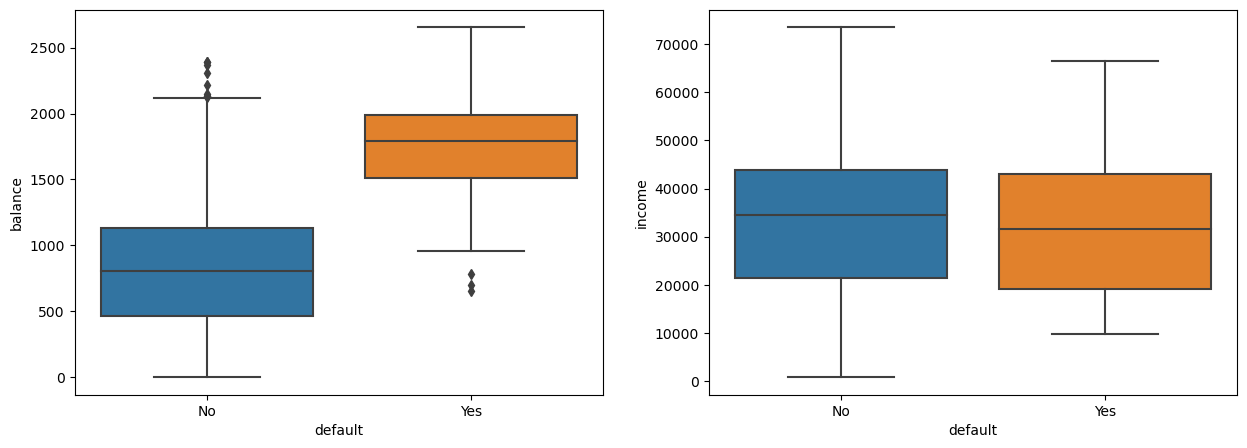

In [27]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x=Default['default'],y=Default['balance'])

plt.subplot(1,2,2)
sns.boxplot(x=Default['default'],y=Default['income'])
plt.show()

# Always map categorical value on x axis
# Those who are not defaulters there balance is between 500 & 1500
# Those who are defaulters there balance is between 1500 & 2000

In [77]:
pd.crosstab(Default['student'],Default['default'],normalize='index').round(2)


default,No,Yes
student,,
No,0.97,0.03
Yes,0.96,0.04


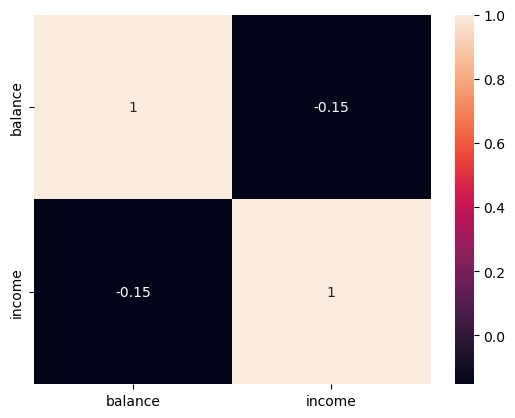

In [78]:
sns.heatmap(Default[['balance','income']].corr(),annot=True)
plt.show()

In [ ]:
#balance and income don't have more correlation

In [34]:
Default.isnull().sum()

Unnamed: 0    0
default       0
student       0
balance       0
income        0
dtype: int64

In [79]:
Q1,Q3=Default['balance'].quantile([.25,.75])#calculating Q1 & Q3
IQR=Q3-Q1
LL=Q1-1.5*(IQR)
UL=Q3+1.5*(IQR)

In [80]:
UL

2193.1743093

In [81]:
LL

-545.1348175

In [82]:
IQR

684.5772817

In [83]:
df=Default[Default['balance']>UL]
df

,Unnamed: 0,default,student,balance,income
173,174,Yes,Yes,2205.799521,14271.492250
1136,1137,Yes,No,2499.016750,51504.293960
1160,1161,Yes,Yes,2502.684931,14947.519750
1359,1360,Yes,No,2220.966201,40725.096210
1502,1503,Yes,Yes,2332.878254,11770.234120
1609,1610,Yes,Yes,2269.946966,18021.105950
2096,2097,Yes,Yes,2261.848162,20030.165120
2140,2141,No,Yes,2308.893236,19110.266410
2929,2930,Yes,Yes,2387.314867,28296.914720
3162,3163,Yes,Yes,2415.316994,17429.503370


In [84]:
df['default'].count()

31

In [85]:
df['default'].value_counts(normalize=True)#83% are defaulters in outtliers

Yes    0.83871
No     0.16129
Name: default, dtype: float64

In [86]:
df['default'].value_counts()# 26% defaulter in outliers

Yes    26
No      5
Name: default, dtype: int64

In [87]:
Default['balance']=np.where(Default['balance']>UL,UL,Default['balance'])

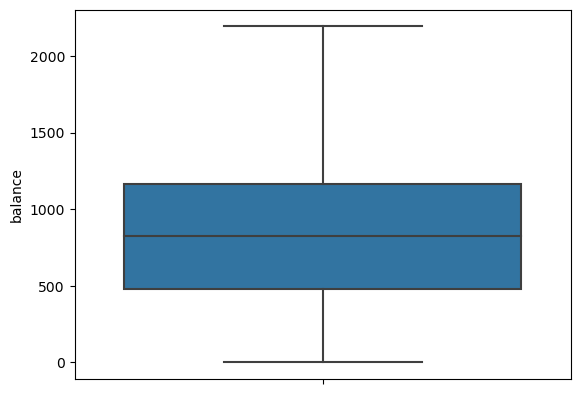

In [88]:
sns.boxplot(y=Default['balance'])
plt.show()

In [89]:
Default=pd.get_dummies(Default,drop_first=True)#yes=1 no=0

In [90]:
Default.head()

,Unnamed: 0,balance,income,default_Yes,student_Yes
0,1,729.526495,44361.62507,0,0
1,2,817.180407,12106.13470,0,1
2,3,1073.549164,31767.13895,0,0
3,4,529.250605,35704.49394,0,0
4,5,785.655883,38463.49588,0,0


In [93]:
Default.columns=['id','balance','income','default','student']

In [94]:
Default.head()

,id,balance,income,default,student
0,1,729.526495,44361.62507,0,0
1,2,817.180407,12106.13470,0,1
2,3,1073.549164,31767.13895,0,0
3,4,529.250605,35704.49394,0,0
4,5,785.655883,38463.49588,0,0


In [95]:
from sklearn.model_selection import train_test_split

In [96]:
x=Default.drop('default',axis=1)# taking other 3 cols not default
y=Default['default']

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=21,stratify=y)# Defaulters percent in training and testing will be same by using startify as yes

In [98]:
print(x_train.shape)
print(x_test.shape)

(7000, 4)
(3000, 4)


In [100]:
print(y_train.value_counts(normalize=True).round(2))
print(' ')
print(y_test.value_counts(normalize=True).round(2))

0    0.97
1    0.03
Name: default, dtype: float64
 
0    0.97
1    0.03
Name: default, dtype: float64


In [101]:
#in both there are 97 defaulters

In [120]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=33,sampling_strategy=0.75)
x_res,y_res=sm.fit_resample(x_train,y_train)

In [121]:

sm=SMOTE(random_state=33,sampling_strategy=0.75)


In [124]:
x_res,y_res=sm.fit_resample(x_train,y_train)

In [125]:
# if we have less value than we can add dumy values to increase values

In [126]:
from sklearn.linear_model import LogisticRegression

In [127]:
lr=LogisticRegression()

In [128]:
lr.fit(x_res,y_res)

LogisticRegression()

In [129]:
y_pred=lr.predict(x_test)

In [130]:
from sklearn.metrics import confusion_matrix,classification_report

In [131]:
confusion_matrix(y_test,y_pred)

array([[2226,  674],
       [  21,   79]], dtype=int64)

In [132]:
#left diagonal-correct values
#right diagonal-wrong values

In [133]:
(2589+75)/(2589+75+311+25)

0.888

In [134]:
#for or logisic regression algorithm we have got accuarcy of 88.8%